In [ ]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
#split = "HuBERT"
split = "Wav2Vec2"
layer_number = 11 

In [ ]:
PROJECT_ROOT = "/content/drive/MyDrive/JPMC_Capstone/Poster_Hidden_States/keywordspotting/Wav2Vec2"

In [ ]:
!pwd

/content


In [ ]:
PROJECT_ROOT = "/content/drive/MyDrive/JPMC_Capstone/Poster_Hidden_States/keywordspotting/Wav2Vec2"

In [ ]:

layer_number = 0
file_name = PROJECT_ROOT + "/1200_layer" + str(layer_number) + "_concatenate" + '.pt'

In [ ]:
# file_name = final_root + "861_layer" + str(0) + "_concatenate" + '.pt'
complete_tensor = torch.load(file_name)
complete_tensor.shape

torch.Size([1200, 49, 768])

In [ ]:
import torch.nn.functional as F

In [ ]:
# shape of outputed hiddden states!
# shape (batch_size, sequence_length, hidden_size)

In [ ]:
'''
import numpy as np
embeeded_layer = torch.flatten(complete_tensor, start_dim=1)
embeeded_layer.shape
'''
embeeded_layer_npArray = complete_tensor.detach().numpy()
print(type(embeeded_layer_npArray))
print(embeeded_layer_npArray.shape)

<class 'numpy.ndarray'>
(1200, 49, 768)


In [ ]:
y=[]
for filename,label in dic.items():
  y.append(label)

y = np.array(y)

print(np.unique(y,return_counts=True))
print(len(y))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]))
1200


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(embeeded_layer_npArray, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(x_train[:5])
print(y_train[:5])
print(x_test[:5])
print(y_test[:5])

[[[ 0.30649462  0.4967485   0.10842719 ... -0.2535282  -0.40947378
   -0.04389531]
  [ 0.11927306  0.29499388  0.08418141 ...  0.23535492 -0.29699606
    0.51740885]
  [ 0.30467182  0.10465398  0.16043262 ...  0.02587144 -0.19949596
    0.24901204]
  ...
  [ 0.20966947 -0.04812983 -0.22052151 ...  0.07862235 -0.19667065
    0.07783277]
  [-0.25035766  0.34214813 -0.19189714 ... -0.0785259  -0.19620155
    0.19336754]
  [ 0.4192721   0.17172322 -0.5167552  ... -0.11023837 -0.16784391
    0.1042634 ]]

 [[-0.17751947  0.13188353 -0.05391225 ...  0.05789977  0.15487438
   -0.24960288]
  [ 0.1366394   0.1854501   0.01336544 ...  0.22685535  0.44102305
   -0.02424739]
  [ 0.31435055  0.36704347 -0.01651937 ...  0.27569002  0.4147963
    0.03262385]
  ...
  [ 0.12887909  0.07367541  0.00923616 ...  0.23467173  0.1277689
   -0.0501844 ]
  [ 0.36934787  0.08214418 -0.05059772 ...  0.4205813   0.41019815
   -0.17633332]
  [ 0.39367974  0.08188879  0.04829562 ...  0.28578234  0.30003694
   -0.37

In [ ]:
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows

In [ ]:
split="Wav2Vec2"
def LSTM_model(num_classes, X_train, y_train, x_test, y_tset):

    model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape = (49, 768), return_sequences = True), # making LSTM bidirectional
    tf.keras.layers.LSTM(64), # making LSTM bidirectional
    tf.keras.layers.Dense(32, activation='relu'), # FC layer for the classification part
    tf.keras.layers.Dense(num_classes, activation='softmax') # final FC layer

    ])
    
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    
    history_callback = model.fit(X_train, y_train, batch_size = 128, epochs = 20, validation_split=0.2,verbose = 2)

    hist = pd.DataFrame(history_callback.history)
    plt.plot(hist.index, hist['loss'], label ='training loss')
    plt.plot(hist.index, hist['val_loss'], label = 'val loss')
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()

    plt.plot(hist.index, hist['accuracy'], '-b', label = 'training accuracy')
    plt.plot(hist.index, hist['val_accuracy'], '-r', label = 'val accuracy')
    plt.legend()
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.show()

    score = model.evaluate(x_test, y_test, verbose = 0)
    print("Test Loss: {:.3f}".format(score[0]))
    print("Test Accuracy: {:.3f}".format(score[1]))

    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred,axis=1)


    from sklearn.metrics import multilabel_confusion_matrix
    multi_confusion = multilabel_confusion_matrix(y_pred, y_test, labels =[0,1,2,3,4,5,6,7,8,9,10,11])
    print('Confusion Matrix\n')
    print(multi_confusion)
    Layer_tp = []
    for i in multi_confusion:
        Layer_tp.append(i[1][1])


    labels = [0,1,2,3,4,5,6,7,8,9,10,11]
    wb = load_workbook(filename = "/content/drive/MyDrive/Heatmap.xlsx") # i.e. "file.xlsx"
    if 'KS_LSTM_' + split not in wb.sheetnames:
        temp_df= pd.DataFrame(columns = ["Label","Layer_0","Layer_1","Layer_2","Layer_3","Layer_4","Layer_5","Layer_6","Layer_7","Layer_8","Layer_9","Layer_10","Layer_11","Layer_12"])
        for i in labels:
            temp_df.loc[len(temp_df.index)] = [i, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
        wb.create_sheet('KS_LSTM_' + split)
        ws = wb['KS_LSTM_' + split]
        rows = dataframe_to_rows(temp_df, index= False)

        for r_idx, row in enumerate(rows, 1):
            for c_idx, value in enumerate(row, 1):
                ws.cell(row=r_idx, column=c_idx, value=value)
        wb.save(filename="/content/drive/MyDrive/Heatmap.xlsx")

    
    wb = load_workbook(filename = "/content/drive/MyDrive/Heatmap.xlsx") # i.e. "file.xlsx"
    ws = wb['KS_LSTM_' + split]
    columns="BCDEFGHIJKLMN"
    for row in range(2,len(labels)+2):  
        cell_name = "{}{}".format(columns[layer_number], row)
        ws[cell_name].value = Layer_tp[row-2]

    cell_name = "{}{}".format(columns[layer_number], len(labels)+2)
    ws[cell_name].value = score[1]

    wb.save(filename="/content/drive/MyDrive/Heatmap.xlsx")

Epoch 1/20
6/6 - 3s - loss: 2.3693 - accuracy: 0.1706 - val_loss: 2.1940 - val_accuracy: 0.3073 - 3s/epoch - 558ms/step
Epoch 2/20
6/6 - 0s - loss: 2.0699 - accuracy: 0.3763 - val_loss: 1.9513 - val_accuracy: 0.3802 - 205ms/epoch - 34ms/step
Epoch 3/20
6/6 - 0s - loss: 1.7217 - accuracy: 0.5247 - val_loss: 1.5783 - val_accuracy: 0.5260 - 217ms/epoch - 36ms/step
Epoch 4/20
6/6 - 0s - loss: 1.3379 - accuracy: 0.6276 - val_loss: 1.2421 - val_accuracy: 0.6250 - 206ms/epoch - 34ms/step
Epoch 5/20
6/6 - 0s - loss: 0.9917 - accuracy: 0.7305 - val_loss: 1.0246 - val_accuracy: 0.6458 - 167ms/epoch - 28ms/step
Epoch 6/20
6/6 - 0s - loss: 0.7039 - accuracy: 0.8255 - val_loss: 0.9429 - val_accuracy: 0.6927 - 167ms/epoch - 28ms/step
Epoch 7/20
6/6 - 0s - loss: 0.5549 - accuracy: 0.8568 - val_loss: 0.7832 - val_accuracy: 0.7500 - 163ms/epoch - 27ms/step
Epoch 8/20
6/6 - 0s - loss: 0.3878 - accuracy: 0.9023 - val_loss: 0.6628 - val_accuracy: 0.7812 - 164ms/epoch - 27ms/step
Epoch 9/20
6/6 - 0s - loss

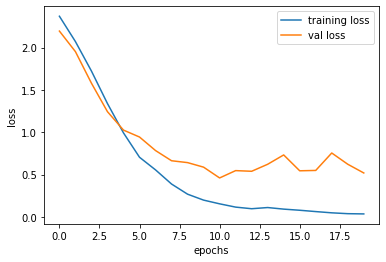

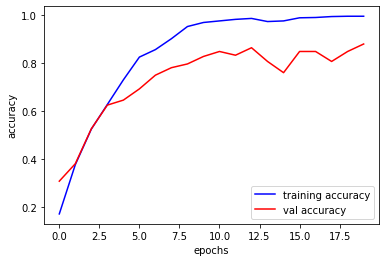

Test Loss: 0.571
Test Accuracy: 0.863
8/8 [==============================] - 1s 6ms/step
Confusion Matrix

[[[218   3]
  [  2  17]]

 [[212   4]
  [  8  16]]

 [[217   3]
  [  3  17]]

 [[217   2]
  [  3  18]]

 [[217   3]
  [  3  17]]

 [[218   1]
  [  2  19]]

 [[220   3]
  [  0  17]]

 [[220   5]
  [  0  15]]

 [[217   1]
  [  3  19]]

 [[216   5]
  [  4  15]]

 [[218   1]
  [  2  19]]

 [[217   2]
  [  3  18]]]


In [ ]:
num_classes=12
LSTM_model(num_classes, x_train, y_train, x_test, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(y_pred)
print(accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.svm import SVC
reg = SVC()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(y_pred)
print(accuracy_score(y_test,y_pred))

[ 2  8  1  1  2  5  1 10  7  2  9  1  5  6  2  7  5  2  3  3  9  0  0  4
  6  1 10  5  0  1  2  5  4  9  8 11  8  3 10  2  8 10 10  3  9 11 11  9
  5  6  2  5  4 10  9  6  5  7  9  9  8 11 10  2  2  6  0  5  9 10  5  5
  2  6  3  4  9  6  3  4  4  0  1  5  5  1  7 10  4  6  6  4 11 11  3  5
  7  4  1  5  5 10 11  8 10  7  0  0  5  5  6  3 11  3  2 11  9  4  9  9
  2 11 10  1  7  5  9  4  4 11  8  8  7  9  4  0  2  8  2  8 10  5  4  0
  6  1  9  0  3 11  7  6  3  6  4 11  5  1  1  5 10 10  2  1 10 11  2  3
 11  4 11  1  3  0  2  1  3  6  0  7  8  2 10  2 11  7 11  8  5 10  8  3
  9  8  7  7  4  8  2  4  0 10  2  3  1  4  2  2 10  7  3  8  6  6  6  4
  0  0  1  6 10 10  9 11  7  5  7  6  2  2  2  5  8  6  2  0  5  9  4  1]
0.8833333333333333


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(y_pred)
print(accuracy_score(y_test,y_pred))

[ 2  8  1  1  2  5  1 10  7  2  9  1  5  6  2  2 11  2  3  3  9  0  0  4
  6  5 10  5  0  1  2  2  4  9  8 11  8  3 10  2  8 10 10  3  9 11 11  9
  4  3  8  0  4 10  9  6  5  2  9  1  8 11 10  2  2  6  0  5  9 10  5  5
  2  6  3  4  9  5  3  4  3  0  1  3  5  1  7 10  4  6  6  4 11  9  3  5
  7  5  1  9  5 10 11  8 10  7  0  0  6  5  6  3 11  3  2 11 11  4  9  9
  2 11 10  1  7  5  1  4  4 11  8  8  6  9  4  0  2  8  2  8 10  0  1  0
  6  3  9  0  3  0  7  6  3  6  4 11  5  1  1  5 10 10  2  1 10 11  7  3
 11  4 11  1  3  0  6  1  3  6  4  7  8  7 10  5 11  6 11  8  5 10  8  5
  9  8  7  7  4  8  2  4  0 10  2  3  1  4  7  2 10  7  3  1  6  6  6  0
  0  0  1  6 10 10  9 11  2  2  7  6  7  2  5  5  8  6  2  0  5  9  4  1]
0.8541666666666666


In [ ]:
def ANN_model(input_shape1, num_classes, X_train, y_train, x_test, y_tset):

    model = Sequential()
    # temp = input_shape1//2
    model.add(Dense(input_shape1//8, activation='relu', input_shape = (input_shape1,)))
    # model.add(Dense(1024, activation='relu'))
    # model.add(Dense(512, activation='relu'))
    # model.add(Dense(64, activation='relu'))

    # while(temp > 32):
        # model.add(Dense(temp//2, activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    history_callback = model.fit(X_train, y_train, batch_size = 64, epochs = 5, validation_split=0.2)

    hist = pd.DataFrame(history_callback.history)
    plt.plot(hist.index, hist['loss'], label ='training loss')
    plt.plot(hist.index, hist['val_loss'], label = 'val loss')
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()

    plt.plot(hist.index, hist['accuracy'], '-b', label = 'training accuracy')
    plt.plot(hist.index, hist['val_accuracy'], '-r', label = 'val accuracy')
    plt.legend()
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.show()

    score = model.evaluate(x_test, y_test, verbose = 0)
    print("Test Loss: {:.3f}".format(score[0]))
    print("Test Accuracy: {:.3f}".format(score[1]))

In [ ]:
input_shape1 = len(embeeded_layer_npArray[0])
num_classes = len(np.unique(y))
print(input_shape1)
print(num_classes)

In [ ]:
ANN_model(input_shape1, num_classes, x_train, y_train, x_test, y_test)